# Visualize and make Calculations from Medical Examination Data

## The rows in the dataset represent patiets and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to exploring the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

- Add an 'overweight' column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each 'cardio' value. The chart should look like "examples/Figure_1.png".
- Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher then systolic (Keep the correct data with `df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less then the 2.5th percentile
  - weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like "examples/Figure_2.png".
- Create a chart, where we show the counts of good and bad outcomes for cholesterol, gluc, alco variable, active, and smoke for patients with cardio=1 and cardio=0 in different panels.


Any time a variable is set to 'None', make sure to set it to the correct code.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [82]:
df = pd.read_csv('../Medical Data visualizer/medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Inspecting the dataset

In [6]:
df.shape

(70000, 13)

In [7]:
# Looking at this day, all the columns are represented in ints and floats. No null values.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# lets see the statistics variations

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Handling and checking for Missing values

In [10]:
# We dont have missing values. But we have to inspect this dataset well to check for other things
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Feature Engineering / Answering Questions

### Add an 'overweight' column to the data. 
To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [83]:
# weight is in kg and height is in cm (we need it in m (m = cm/100))
df['overweight'] = round(df['weight']/((df['height']/100)**2),2)
df.loc[df['overweight'] < 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.0


### Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [88]:
# Do this for glu and cholestorol
# if value is > 1, make it 1
# if value is 1, make it 0
# 0 = 'always good'
# 1 = 'always bad'

# df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
# df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
# df.loc[df['gluc'] == 1, 'gluc'] = 0
# df.loc[df['gluc'] > 1, 'gluc'] = 1
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


### Create a chart, where we show the counts of good and bad outcomes for cholesterol, gluc, alco variable, active, and smoke for patients with cardio=1 and cardio=0 in different panels.

<Figure size 600x500 with 0 Axes>

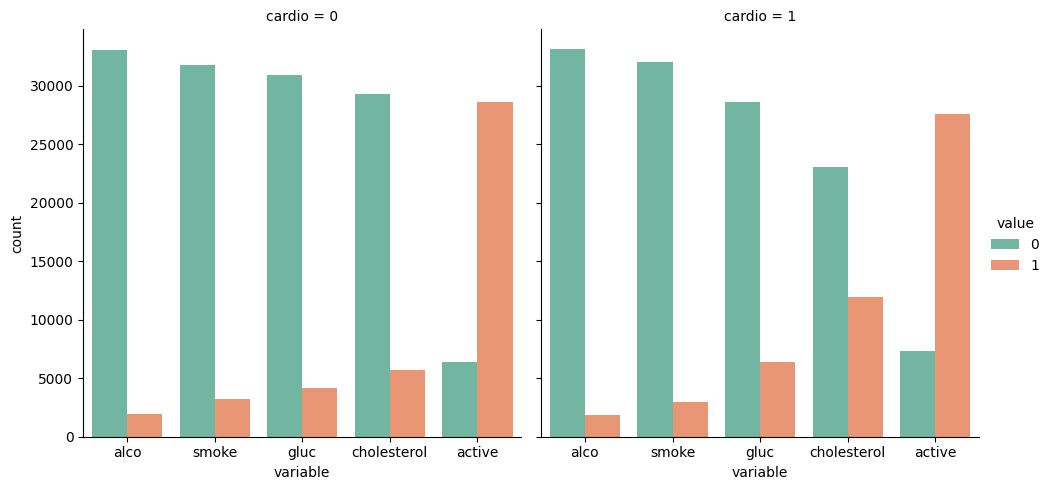

In [98]:
def goodBadOutcome (df):
    # selecting columns to use
    df_chart = df[['cholesterol', 'gluc', 'smoke', 'alco','active', 'cardio']]

    # converting the data into a long format to better visualize and convert it to frame
    outcome = pd.melt(df_chart, id_vars=['cardio'], value_vars=df_chart).value_counts().to_frame()
    outcome.reset_index(inplace=True)
    outcome

    # visualizing
    plt.figure(figsize=(6,5))
    sns.catplot(outcome, x='variable', y='count', hue='value', col='cardio', palette='Set2', kind='bar')
    plt.show()
    
goodBadOutcome(df)

### Clean the data. Filter out the following patient segments that represent incorrect data.
### Create a heatmap

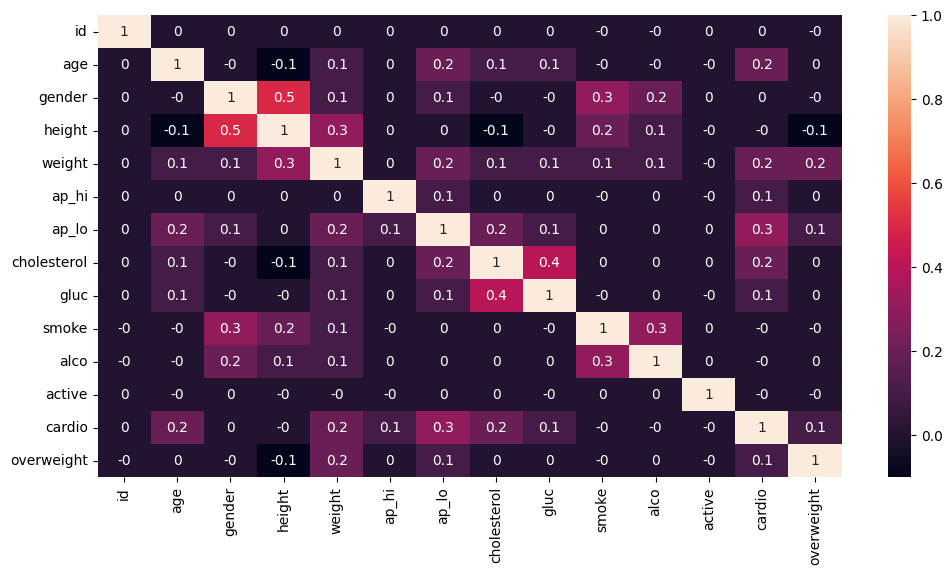

In [114]:
height025 = df['height'].quantile(0.025)
height975 = df['height'].quantile(0.975)
weight025 = df['weight'].quantile(0.025)
weight975 = df['weight'].quantile(0.975)
df_heat = df[df['ap_lo'] <= df['ap_hi']]
df_heat = df_heat[df_heat['height'] >= height025]
df_heat = df_heat[df_heat['height'] <= height975]
df_heat = df_heat[df_heat['weight'] >= weight025]
df_heat = df_heat[df_heat['weight'] <= weight975]

# Calculate the correlation matrix
corr = df_heat.corr()
corr = corr.round(1)

# Ploting
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.show()